# Yulu - Hypothesis Testing - Business Use Case

**Objective**

  Apply Hypothesis testing to the Yulu data and provide business insights.



## Setting up Environment

##### Importing required packages

In [1]:
from matplotlib import pyplot as plt
from scipy.stats import norm

import io
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

In [2]:
BOLD = '\033[1m'
END = '\033[0m'

##### Loading Data

Lets load the bike sharing data and get a quick glimpse of the data.

In [3]:
yulu_df = pd.read_csv('bike_sharing.csv')

display(yulu_df.head())

rows, cols = yulu_df.shape
print("\n")
print(f'Yulu, Bike Sharing dataset has {BOLD}{rows}{END} rows and {BOLD}{cols}{END} fields.')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1




Yulu, Bike Sharing dataset has 10886 rows and 12 fields.


### 10k feet view

In [4]:
yulu_df.sample(10).sort_values(by='datetime')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
2148,2011-05-16 10:00:00,2,0,1,1,25.42,30.305,65,6.0032,37,75,112
2730,2011-07-02 16:00:00,3,0,0,1,36.08,37.120,22,15.0013,206,192,398
3670,2011-09-03 20:00:00,3,0,0,1,28.70,33.335,79,11.0014,99,120,219
4215,2011-10-07 16:00:00,4,0,1,1,26.24,31.060,44,0.0000,73,346,419
4364,2011-10-13 21:00:00,4,0,1,1,25.42,28.790,83,12.9980,8,115,123
5465,2012-01-02 20:00:00,1,1,0,1,9.84,11.365,41,15.0013,5,83,88
7663,2012-05-18 16:00:00,2,0,1,1,27.06,31.060,34,16.9979,151,417,568
9929,2012-10-18 02:00:00,4,0,1,1,18.86,22.725,82,12.9980,1,13,14
9995,2012-11-01 20:00:00,4,0,1,2,15.58,19.695,54,16.9979,16,280,296
10179,2012-11-09 13:00:00,4,0,1,1,18.86,22.725,38,19.9995,62,237,299


In [5]:
yulu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
yulu_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


##### Nulls Check

In [7]:
(yulu_df.isna().sum() / len(yulu_df)) * 100

datetime      0.0
season        0.0
holiday       0.0
workingday    0.0
weather       0.0
temp          0.0
atemp         0.0
humidity      0.0
windspeed     0.0
casual        0.0
registered    0.0
count         0.0
dtype: float64

##### Duplicates Check

In [8]:
duplicated = yulu_df[yulu_df.duplicated()]
print(f"Number of duplicate rows: {len(duplicated)}")

Number of duplicate rows: 0


##### Correlation

<Axes: >

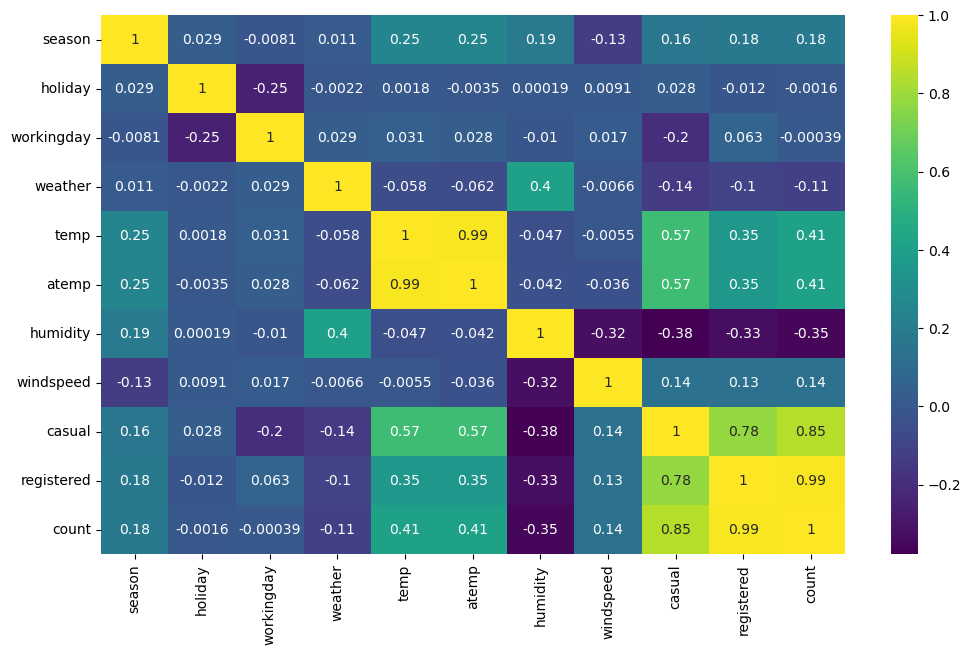

In [9]:
plt.figure(figsize=(12, 7))
sns.heatmap(yulu_df.drop(columns=['datetime']).corr(method='spearman'), annot=True, cmap='viridis')

##### Summary

* Data is clean with no null values & no duplicates. Hence, no modifications are required.
* We can ascertain below points from the above correlation plot
  * `temp` & `atemp` and `casual`, `registered` & `count` are highly +ve correlated.
  * `humidity` is -ve correlated with `windspeed`, `casual`, `registered` adn `count`.

### Handling Data

#### Data Description

**datetime** - datetime

**season** - season (1: spring, 2: summer, 3: fall, 4: winter)

**holiday** - whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)

**workingday** - if day is neither weekend nor holiday is 1, otherwise is 0.

**weather** -
  1. Clear, Few clouds, partly cloudy, partly cloudy
  2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

**temp** - temperature in Celsius

**atemp** - feeling temperature in Celsius

**humidity** - humidity

**windspeed** - wind speed

**casual** - count of casual users

**registered** - count of registered users

**count** - count of total rental bikes including both casual and registered

Based on the above summary and the provided data description, we need to make some modifications for the data.

##### Data Type Conversions
Converting the default data types to necessary data types.

  * **datetime** field to be updated from *object* to *datetime*.
  * **season, holiday, workingday, weather** fields to be updated to *category*.

In [10]:
yulu_df['datetime'] = pd.to_datetime(yulu_df['datetime'])
yulu_df = yulu_df.astype({'season': 'category', 'holiday': 'category', 'workingday': 'category',	'weather': 'category'})

In [11]:
yulu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 723.7 KB


##### Dropping Columns

In [12]:
yulu_df.drop(columns=['atemp', 'casual', 'registered'], inplace=True)

##### Renaming Columns

This step is not required in general, I'm doing it since it might conflict with the plots generated.

In [13]:
yulu_df.rename(columns={'count':'daily_usage'}, inplace=True)

##### Column Collections

In [14]:
from logging import warning
cat_cols = []
num_cols = []

for i in yulu_df.columns:
  if (yulu_df[i].dtype == 'category'):
    cat_cols.append(i)
  elif (yulu_df[i].dtype == 'int64') or (yulu_df[i].dtype == 'float64'):
    num_cols.append(i)
  else:
    msg = f"Column {i} belongs neither to category nor integer."
    warnings.warn(msg, RuntimeWarning)

C:\Users\sarat\AppData\Local\Temp\ipykernel_14708\1886265822.py:12: RuntimeWarning: Column datetime belongs neither to category nor integer.
  warnings.warn(msg, RuntimeWarning)


In [15]:
print(cat_cols)
print(num_cols)

['season', 'holiday', 'workingday', 'weather']
['temp', 'humidity', 'windspeed', 'daily_usage']


## Univariate Analysis

#### Categorical Univariate Analysis

##### Using Raw Data

In [16]:
for i in cat_cols:
  # print(i)
  display(yulu_df[i].unique())
  print("\n")
  display(yulu_df[i].value_counts().reset_index())

[1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]

,season,count
0,4,2734
1,2,2733
2,3,2733
3,1,2686


[0, 1]
Categories (2, int64): [0, 1]

,holiday,count
0,0,10575
1,1,311


[0, 1]
Categories (2, int64): [0, 1]

,workingday,count
0,1,7412
1,0,3474


[1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]

,weather,count
0,1,7192
1,2,2834
2,3,859
3,4,1


##### Using Plots

<Axes: xlabel='weather', ylabel='daily_usage'>

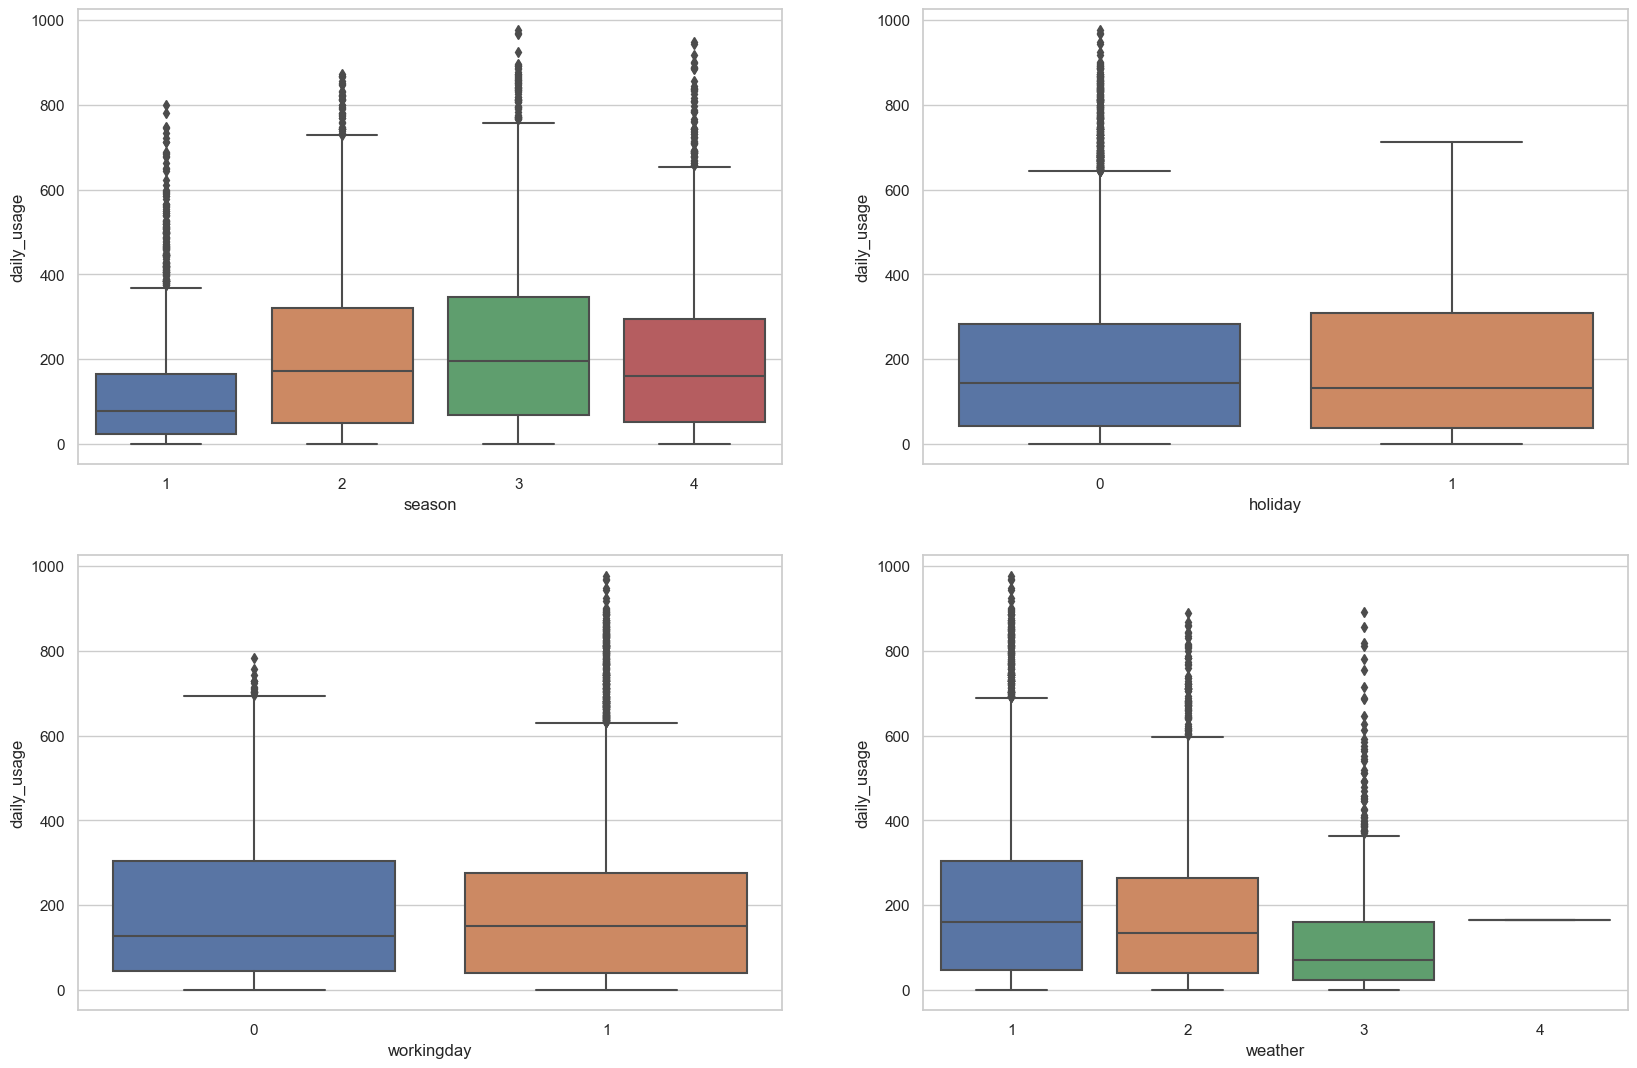

In [17]:
sns.set(style='whitegrid')

fig, axes = plt.subplots(2,2,figsize=(20, 13))

sns.boxplot(data=yulu_df, x=cat_cols[0], y='daily_usage', ax=axes[0,0])
sns.boxplot(data=yulu_df, x=cat_cols[1], y='daily_usage', ax=axes[0,1])
sns.boxplot(data=yulu_df, x=cat_cols[2], y='daily_usage', ax=axes[1,0])
sns.boxplot(data=yulu_df, x=cat_cols[3], y='daily_usage', ax=axes[1,1])

**Conclusion**

From the above plots, we can assume below:

* Bike usage is dependent on season with season 2 and season 3 having higher averages while season 1 is having higher outliers means, having a higher surge in demand at once.
* Demand on holidays and non-holidays is similar with higher outliers on non-holidays means, at a specific time, there is more demand.
* Demand is not effected by working day, but similar to the above, time based higher demand.
* Weather 1 and Weather 2 are similar with a less demand in weather 3.

#### Numerical Univariate Analysis

##### Using Plots

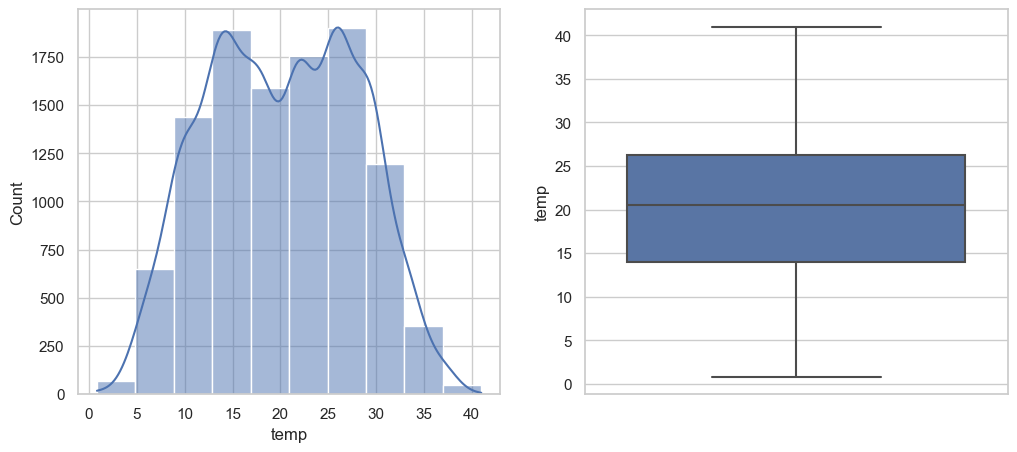

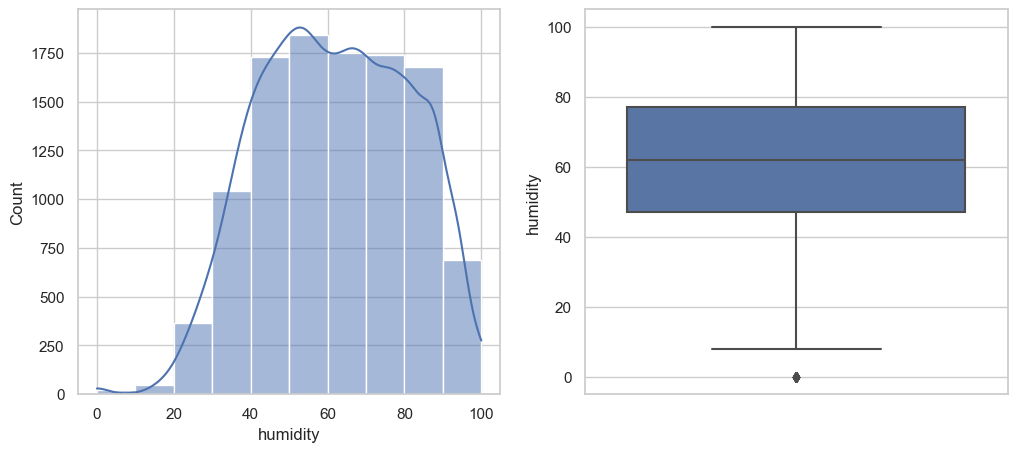

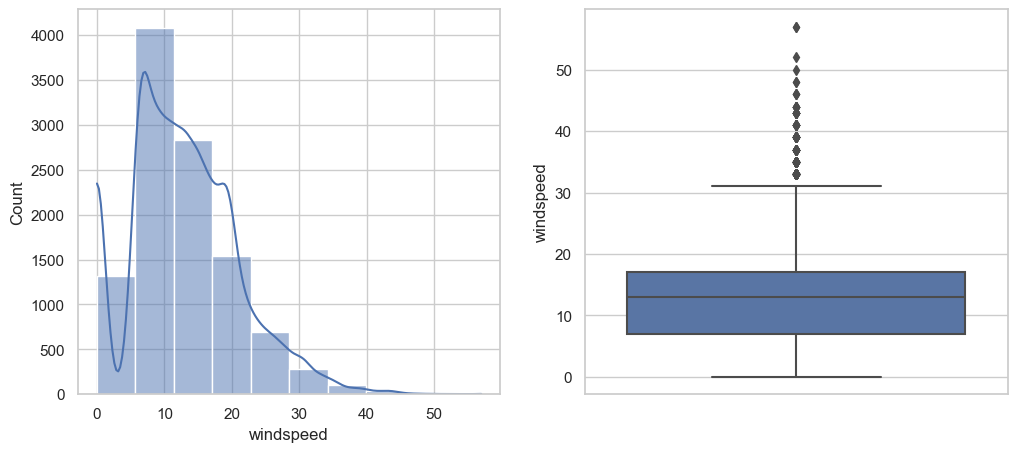

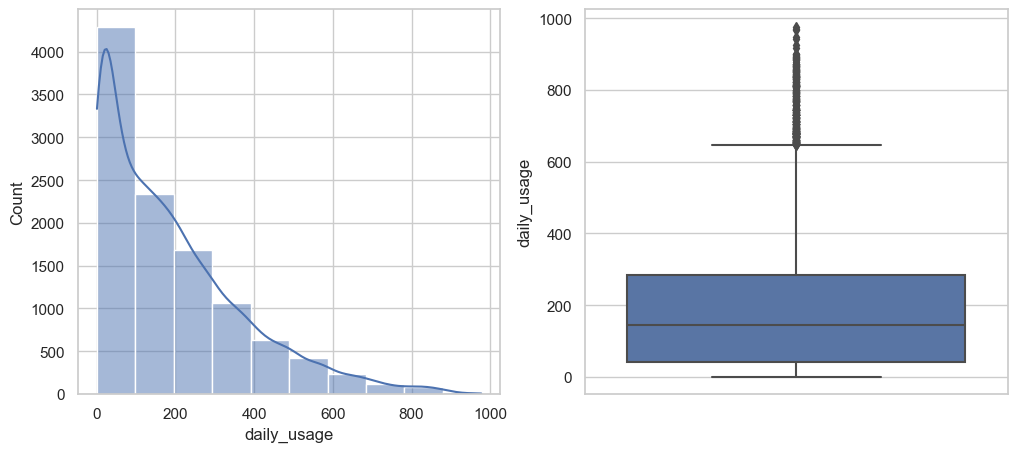

In [18]:
sns.set(style='whitegrid')

for i in range(len(num_cols)):
  fig, axes = plt.subplots(1,2,figsize=(12, 5))
  sns.histplot(data=yulu_df, x=num_cols[i], kde=True, bins=10, ax=axes[0])
  sns.boxplot(data=yulu_df, y=num_cols[i], ax=axes[1])

**Conclusion**

* Target variable, *daily_usage* is a right skewed data. It has outliers on the higher end.
  * We can handle these by checking with business and identifying the importance of these records. Based on that, we can remove them.
  * Converting the data to log scale, to see if the data is normal.
* Feature, *windspeed* also has some outliers, as we dont have any assumptions related to this variable, we can ignore it.

## Bivariate Analysis

In [19]:
cat_cols

['season', 'holiday', 'workingday', 'weather']

##### Season vs Daily Usage

<Axes: xlabel='season', ylabel='daily_usage'>

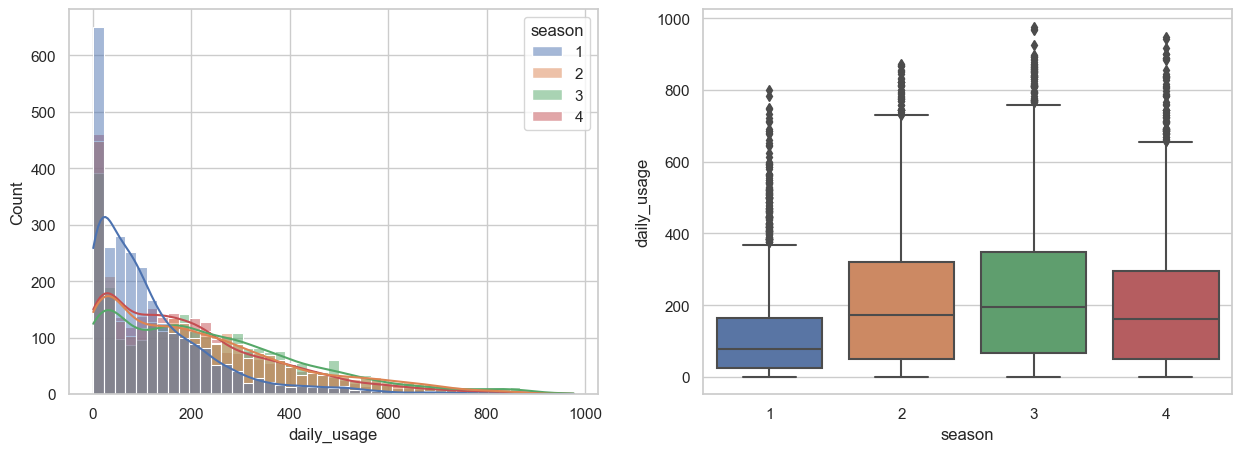

In [20]:
sns.set(style='whitegrid')
fig, axes = plt.subplots(1,2,figsize=(15, 5))
sns.histplot(data=yulu_df, x = yulu_df['daily_usage'], hue=yulu_df['season'], kde=True, ax=axes[0])
sns.boxplot(data=yulu_df, x =yulu_df['season'] , y=yulu_df['daily_usage'], ax = axes[1])

In [21]:
pd.DataFrame(yulu_df.groupby('season')['daily_usage'].describe())

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


##### Holiday vs Daily Usage

<Axes: xlabel='holiday', ylabel='daily_usage'>

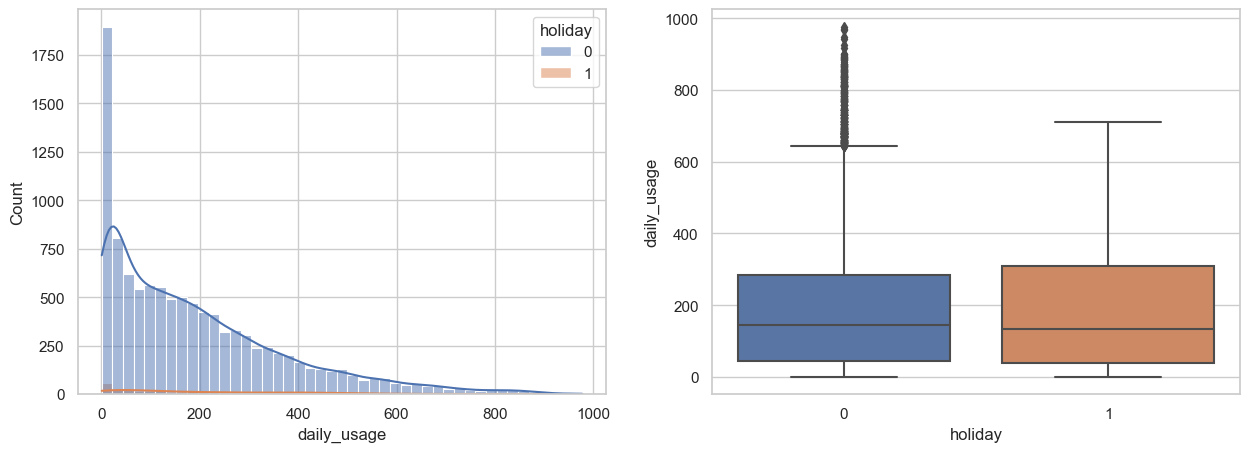

In [22]:
sns.set(style='whitegrid')
fig, axes = plt.subplots(1,2,figsize=(15, 5))
sns.histplot(data=yulu_df, x = yulu_df['daily_usage'], hue=yulu_df['holiday'], kde=True, ax=axes[0])
sns.boxplot(data=yulu_df, x =yulu_df['holiday'] , y=yulu_df['daily_usage'], ax = axes[1])

In [23]:
pd.DataFrame(yulu_df.groupby('holiday')['daily_usage'].describe())

,count,mean,std,min,25%,50%,75%,max
holiday,,,,,,,,
0,10575.0,191.741655,181.513131,1.0,43.0,145.0,283.0,977.0
1,311.0,185.877814,168.300531,1.0,38.5,133.0,308.0,712.0


##### Workingday vs Daily Usage

<Axes: xlabel='workingday', ylabel='daily_usage'>

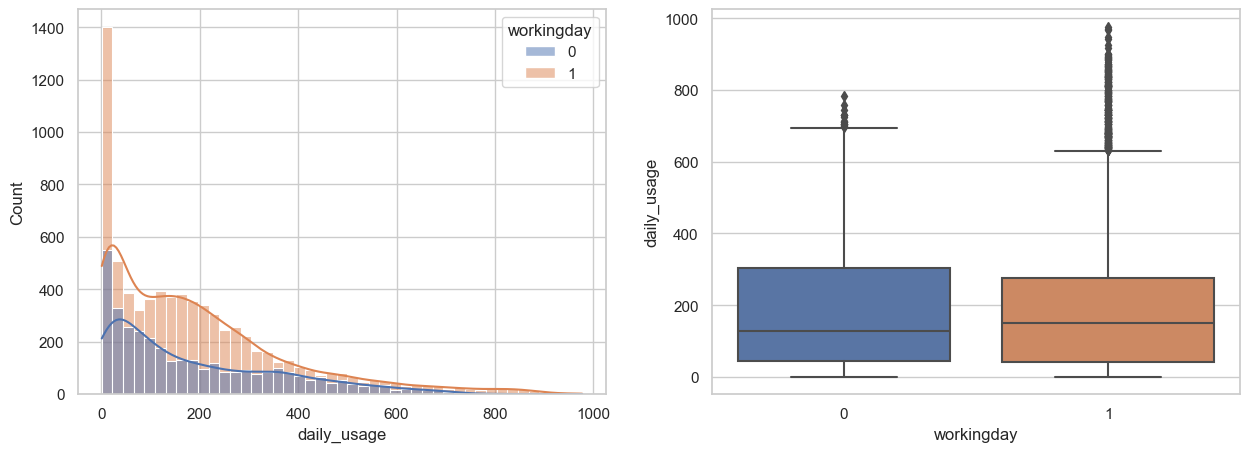

In [24]:
sns.set(style='whitegrid')
fig, axes = plt.subplots(1,2,figsize=(15, 5))
sns.histplot(data=yulu_df, x = yulu_df['daily_usage'], hue=yulu_df['workingday'], kde=True, ax=axes[0])
sns.boxplot(data=yulu_df, x =yulu_df['workingday'] , y=yulu_df['daily_usage'], ax = axes[1])

In [25]:
pd.DataFrame(yulu_df.groupby('workingday')['daily_usage'].describe())

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


##### Weather vs Daily Usage

<Axes: xlabel='weather', ylabel='daily_usage'>

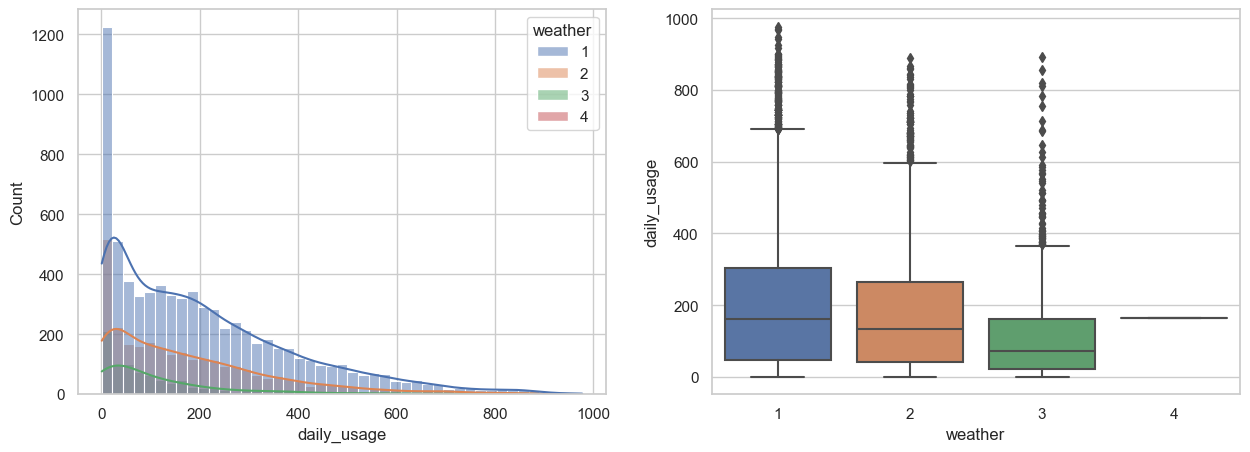

In [26]:
sns.set(style='whitegrid')
fig, axes = plt.subplots(1,2,figsize=(15, 5))
sns.histplot(data=yulu_df, x = yulu_df['daily_usage'], hue=yulu_df['weather'], kde=True, ax=axes[0])
sns.boxplot(data=yulu_df, x =yulu_df['weather'], y=yulu_df['daily_usage'], ax = axes[1])

In [27]:
pd.DataFrame(yulu_df.groupby('weather')['daily_usage'].describe())

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


##### Season vs Daily Usage

<Axes: xlabel='season', ylabel='daily_usage'>

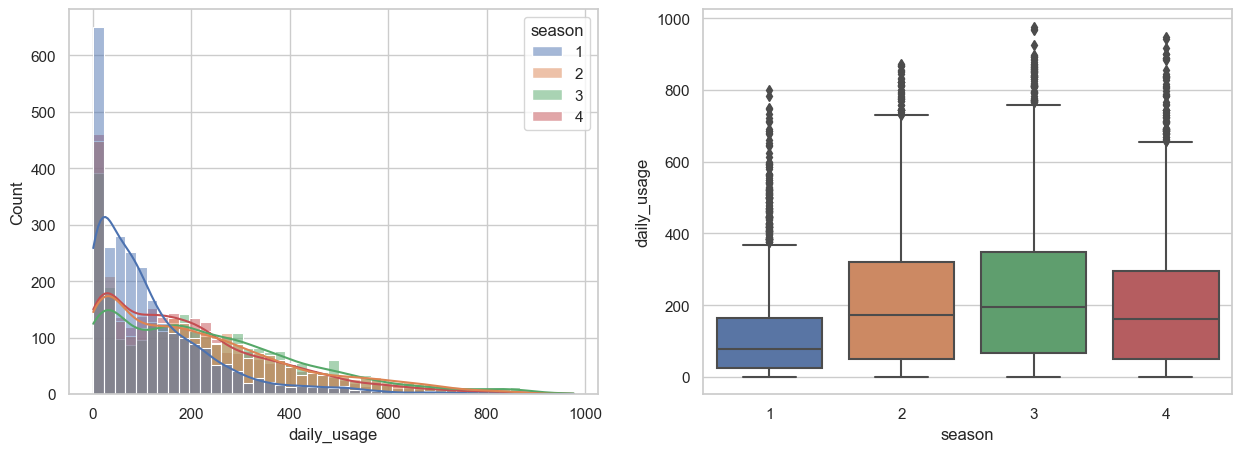

In [28]:
sns.set(style='whitegrid')
fig, axes = plt.subplots(1,2,figsize=(15, 5))
sns.histplot(data=yulu_df, x = yulu_df['daily_usage'], hue=yulu_df['season'], kde=True, ax=axes[0])
sns.boxplot(data=yulu_df, x =yulu_df['season'], y=yulu_df['daily_usage'], ax = axes[1])

In [29]:
pd.DataFrame(yulu_df.groupby('season')['daily_usage'].describe())

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


## Hypothesis Testing

#### Significance of workingday on bike usage

**Step 1**: Define Null & Alternate Hypothesis

$H_0$: Demand for bikes on non-workingdays is less than or similar to the workingdays

$H_1$: Demand for bikes on non-workingdays is higher than workingdays

Assuming $\mu_1$ and $\mu_2$ are the average number of bikes rented on non-workingdays and workingys respectively.

Mathematically , above can be written as

$H_0: \mu_1 <= \mu_2$

$H_1: \mu_1 > \mu_2$

**Step 2**: Select appropriate test

From above, we can see that standard deviations are not same, two sample independent one-tailed t-test is appropriate

In [30]:
weekend = yulu_df[yulu_df['workingday'] == 0]['daily_usage'].sample(2999)
weekday = yulu_df[yulu_df['workingday'] == 1]['daily_usage'].sample(2999)

**Step 3**: Define significance level

As given in the problem statement, selecting $\alpha$ = 0.05

**Step 4** : Calculating p-value

In [31]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(weekend, weekday, equal_var = False, alternative = 'greater' )

**Step 5**: Conclusion

In [32]:
print(f"p_value: {p_value}")

p_value: 0.9485812315252028


Since, p_value is not less than significance level, we **fail to reject null hypothesis**.

Hence, Demand for bikes on non-workingdays is less than or similar to the workingdays

#### Significance of holiday on bike usage

**Step 1**: Define Null & Alternate Hypothesis

$H_0$: Demand for bikes on regular days is more than or similar to the holidays

$H_1$: Demand for bikes on regular days is less than holidays

Assuming $\mu_1$ and $\mu_2$ are the average number of bikes rented on regular days and holidays respectively.

Mathematically , above can be written as

$H_0: \mu_1 >= \mu_2$

$H_1: \mu_1 < \mu_2$

**Step 2**: Select appropriate test

From above, we can see that standard deviations are not same, two sample independent one-tailed t-test is appropriate

In [33]:
regular = yulu_df[yulu_df['holiday'] == 0]['daily_usage'].sample(299)
holiday = yulu_df[yulu_df['holiday'] == 1]['daily_usage'].sample(299)

**Step 3**: Define significance level

As given in the problem statement, selecting $\alpha$ = 0.05

**Step 4** : Calculating p-value

In [34]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(regular, holiday, equal_var = False, alternative = 'less' )

In [35]:
print(f"p_value: {p_value}")

p_value: 0.879504393078168


**Step 5**: Conclusion

Since, p_value is not less than significance level, we **fail to reject null hypothesis**.

Hence, demand for bikes is same on holidays and on regular days.

#### Significance of weather on bike usage

**Step 1**: Define Null & Alternate Hypothesis

$H_0$: Demand for bikes in different weather conditions are equal.

$H_1$: Demand for bikes for atleast in one weather condition is different.

Assuming $\mu_1$, $\mu_2$ and $\mu_3$ are the means of the weather 1, weather 2 and weather 3 respectively.

Mathematically, above can be written as

$H_0$: $\mu_1$ = $\mu_2$ = $\mu_3$

$H_1$: $\mu_1 \neq \mu_2 = \mu_3$ or $\mu_1 = \mu_2 \neq \mu_3$ or $\mu_1 = \mu_3 \neq \mu_2$

**Step 2**: Select appropriate test

As this is a problem with three different means, we can use **One way ANOVA**.

Assumptions:

* Data should be independent.
* Data is normally distributed.
* Homogeneity of variances.

So, before applying ANOVA, let's check these and proceed further with ANOVA.

We will apply Shapiro-Wilk's test for normality check and Levene's test for variances check.

##### Shapiro-Wilk's test

$H_0$: Data follows gaussian distribution.

$H_1$: Data doesn't follow gaussian distribution.


Consider, significance level, $\alpha$ = 0.05

We need to consider samples less than 5000 for shapiro's test as the result might be inconsistent.

In [36]:
from scipy.stats import shapiro

In [37]:
stat, p_val = shapiro(yulu_df['daily_usage'].sample(4999))

In [38]:
print(f"test statistic: {stat}")
print(f"p value: {p_val}")

test statistic: 0.8824576735496521
p value: 0.0


Since p value is less than $\alpha$, we reject null hypothesis.

##### Levene's test

$H_0$: Variances of all groups are equal.

$H_1$: Atleast one group has different variance.


Consider, significance level, $\alpha$ = 0.05

Creating data for this test. We are ignoring the fourth weather as it has only 1 record.

In [39]:
w1 = yulu_df[yulu_df['weather'] == 1]['daily_usage']
w2 = yulu_df[yulu_df['weather'] == 2]['daily_usage']
w3 = yulu_df[yulu_df['weather'] == 3]['daily_usage']

In [40]:
from scipy.stats import levene

In [41]:
stat, p_val = levene(w1, w2, w3)

print(f"test statistic: {stat}")
print(f"p value: {p_val}")

test statistic: 81.67574924435011
p value: 6.198278710731511e-36


Since p_value is less than $\alpha$, rejecting null hypothesis.

Since the assumptions are not being met, we cannot proceed with the test. We need to use KS Test.

However, it was suggested to proceed with the test.

**Step 3**: Define significance level

As given in the problem statement, selecting $\alpha$ = 0.05

**Step 4** : Calculating p-value

In [42]:
from scipy.stats import f_oneway

In [43]:
stat, p_val = f_oneway(w1, w2, w3)

print(f"test statistic: {stat}")
print(f"p value: {p_val}")

test statistic: 98.28356881946706
p value: 4.976448509904196e-43


**Step 5**: Conclusion

Since p_value is less than $\alpha$, rejecting null hypothesis.

Hence, demand for bikes varies based on the weather.

#### Significance of season on bike usage

**Step 1**: Define Null & Alternate Hypothesis

$H_0$: Demand for bikes in different seasons conditions are equal.

$H_1$: Demand for bikes for atleast in one season condition is different.

Assuming $\mu_1$, $\mu_2$, $\mu_3$ and $\mu_4$ are the means of the season 1, season 2, season 3 and season 4 respectively.

Mathematically, above can be written as

$H_0$: $\mu_1$ = $\mu_2$ = $\mu_3$ = $\mu_4$

$H_1$: $\mu_1 \neq \mu_2 = \mu_3 = \mu_4$ or $\mu_1 = \mu_2 \neq \mu_3 = \mu_4$ or $\mu_1 = \mu_3 \neq \mu_2 = \mu_4$

**Step 2**: Select appropriate test

As this is a problem with three different means, we can use **One way ANOVA**.

So, similar to above, before applying ANOVA, let's check the assumptions and proceed further with ANOVA.

Shapiro-Wilk's test for normality is failed, so lets check Levene's test for variances.

##### Levene's test

$H_0$: Variances of all groups are equal.

$H_1$: Atleast one group has different variance.


Consider, significance level, $\alpha$ = 0.05

Creating data for this test.

In [44]:
s1 = yulu_df[yulu_df['season'] == 1]['daily_usage']
s2 = yulu_df[yulu_df['season'] == 2]['daily_usage']
s3 = yulu_df[yulu_df['season'] == 3]['daily_usage']
s4 = yulu_df[yulu_df['season'] == 4]['daily_usage']

In [45]:
from scipy.stats import levene

In [46]:
stat, p_val = levene(s1, s2, s3, s4)

print(f"test statistic: {stat}")
print(f"p value: {p_val}")

test statistic: 187.7706624026276
p value: 1.0147116860043298e-118


Since p_value is less than $\alpha$, rejecting null hypothesis.

Since the assumptions are not being met, we cannot proceed with the test. We need to use KS Test.

However, it was suggested to proceed with the test.

**Step 3**: Define significance level

As given in the problem statement, selecting $\alpha$ = 0.05

**Step 4** : Calculating p-value

In [47]:
from scipy.stats import f_oneway

In [48]:
stat, p_val = f_oneway(s1, s2, s3, s4)

print(f"test statistic: {stat}")
print(f"p value: {p_val}")

test statistic: 236.94671081032106
p value: 6.164843386499654e-149


**Step 5**: Conclusion

Since p_value is less than $\alpha$, rejecting null hypothesis.

Hence, we can conclude that demand for bikes is dependent on seasons.

#### Weather vs Season

**Step 1**: Define Null & Alternate Hypothesis

$H_0$: Season and weather are not associated.

$H_1$: Season and weather are associated.

**Step 2**: Select appropriate test

As both the variables are categorical, we need to use Chi-Square test.

We need to create data for this.

In [49]:
table = pd.crosstab(yulu_df['season'], yulu_df['weather'])
table

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


**Step 3**: Define significance level

As given in the problem statement, selecting $\alpha$ = 0.05

**Step 4**: Calculate p-value

In [50]:
from scipy.stats import chi2_contingency

In [51]:
chi2_opt = chi2_contingency(table)

print(f"test statistic: {chi2_opt.statistic}")
print(f"p value: {chi2_opt.pvalue}")

test statistic: 49.158655596893624
p value: 1.549925073686492e-07


**Step 5**: Conclusion

Since p_value is less than significance level, we reject null hypothesis.

Hence, there is a dependency of season on weather.

## Conclusion

* Demand for bikes on non-workingdays is less than or similar to the workingdays.
* Demand for bikes is same on holidays and on regular days.
* Demand for bikes varies based on the weather.
* Demand for bikes is season-dependent.
* There is a dependency of season on weather.